In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import itertools

In [2]:
costs = [
'1: Base: 2.171054782327754 * HR$ + 0.00035786851$',
'2: 1 + Hashes: 2.1742524704008743 * HR$ + 0.00041607478$',
'3: 2 + JSON Sentences: 1.9834254143646408 * HR$ + 0.00087945911$',
'4: 3 + System Prompt: 1.8695903879832472 * HR$ + 0.00172213537$',
'5: 4 + only substring: 1.498785927512455 * HR$ + 0.0004752151$',
'6: 5 + full sentence: 2.027491381541264 * HR$ + 0.0011601353$',
'7: 4 + only structured input: 1.3957601944133131 * HR$ + 0.00053962014$',
'8: 4+ structured input with labels: 1.4897876524072997 * HR$ + 0.00083634324$',
'9: 7 + full sentences: 1.9181908387478412 * HR$ + 0.00150878939$',
'10: 7 + long task description: 1.2086973075048733 * HR$ + 0.00135234273$',
'11: 10 + 1 shot each: 1.2024279630551407 * HR$ + 0.00180994284$',
'12: 10 + 10 shots each: 1.1772238514173998 * HR$ + 0.0008672445$',
'13: 10 + 50 shots each: 1.257043439998393 * HR$ + 0.00311584917$',
'14: 10 + 5 shots each: 1.1707305826215968 * HR$ + 0.00106071951$',
'15: 14 + classify 100: 1.134735576164292 * HR$ + 0.00126685238$',
'16: 14 + classify 25: 1.1829188346040267 * HR$ + 0.00111880849$',
'18: 15 + vote of 3: 1.1023411417642188 * HR$ + 0.0034351112$',
'19: 18 + GPT4: 1.1068841963083391 * HR$ + 0.09524704954$'
]


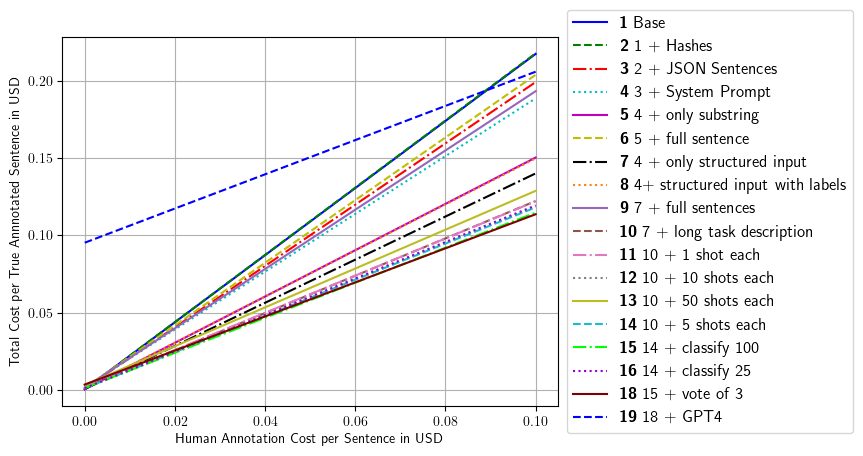

In [3]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()

# HR range, adjust as needed
hr = np.linspace(0, 0.1, 100)

# Define colors and line styles using itertools.cycle
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lime', 'darkviolet', 'maroon'])
line_styles = itertools.cycle(['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--'])

for line in costs:
    # Using regex to extract coefficients and constants from the line
    match = re.search(r":.*?: ([\d\.]+) \* HR\$ \+ ([\d\.]+)\$", line)
    coef, const = float(match.group(1)), float(match.group(2))

    # Calculating total cost
    total_cost = coef * hr + const

    # Extracting label from line for the plot legend
    label_match = re.search(r"(.+):(.+):", line)

    label_1 = label_match.group(1)
    label_2 = label_match.group(2)

    # Plotting with distinct color and line style
    ax.plot(hr, total_cost, label='\\textbf{' + label_1 + '} ' + label_2, color=next(colors), linestyle=next(line_styles))

# Adding legend outside the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large', frameon=True)

# Adding labels and title
ax.set_xlabel('Human Annotation Cost per Sentence in USD')
ax.set_ylabel('Total Cost per True Annnotated Sentence in USD')
ax.grid(True)

plt.savefig('../plots/costs.pdf', bbox_inches='tight')

plt.show()